In [1]:
#the goal is to plot correlations and run the models to get some ideas
#also try for monte carlo simulation
#try for moran's I statistic
#plot more vizs

In [21]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;
import statsmodels.api as sm;
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('MappedDataset.csv')

In [4]:
data['COUNTY_NAME'].unique()

array(['Harris', 'Waller', 'Fort_Bend', 'Brazoria', 'Montgomery',
       'Galveston', 'Austin', 'Chambers'], dtype=object)

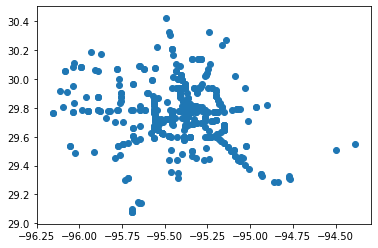

In [5]:
plt.scatter(data['LONGITUDE_IB_CW'],data['LATITUDE_IB_CW'])
plt.show()

In [6]:
data.head()

,ROADWAY_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TOTAL_MINUTES,ENTER_DATE,ENTER_TIME,CLEAR_DATE,CLEAR_TIME,elev_meters,Rain_Totals_mm,Rain_Dist_meters,Highway_Inc_Length_m,Rain_Dist_miles,Rain_Totals_meters
0,BELTWAY 8-EAST,29.8085,29.8089,-95.1639,-95.1628,Harris,0,8/26/2017,3:56,8/26/2017,3:56,10.10,37.44,550.454556,115.211774,0.342037,0.03744
1,BELTWAY 8-EAST,29.6656,29.6656,-95.1558,-95.1556,Harris,357,8/26/2017,8:06,8/26/2017,14:03,8.88,39.75,2892.704125,19.361625,1.797443,0.03975
2,BELTWAY 8-EAST,29.8830,29.8830,-95.1984,-95.1984,Harris,4745,8/27/2017,1:50,8/30/2017,8:55,14.32,8.25,3149.513177,0.000000,1.957017,0.00825
3,BELTWAY 8-EAST,29.8830,29.8830,-95.1984,-95.1984,Harris,4351,8/27/2017,8:49,8/30/2017,9:20,14.32,8.25,3149.513177,0.000000,1.957017,0.00825
4,BELTWAY 8-EAST,29.6498,29.6498,-95.1562,-95.1561,Harris,4138,8/27/2017,11:55,8/30/2017,8:53,9.61,39.75,1241.143782,9.682325,0.771211,0.03975


In [7]:
x = data[['LONGITUDE_IB_CW','LATITUDE_IB_CW']]
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 3, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,

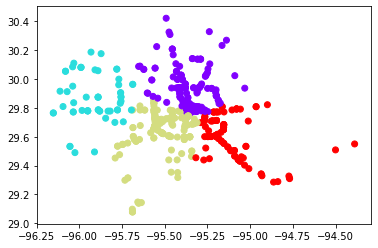

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['LONGITUDE_IB_CW'],data_with_clusters['LATITUDE_IB_CW'],c=data_with_clusters['Clusters'], cmap='rainbow')




Text(0.5, 0, 'Features')

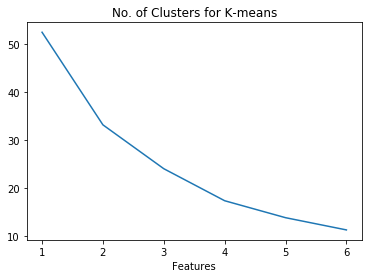

In [11]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title("No. of Clusters for K-means")
plt.xlabel("Features")

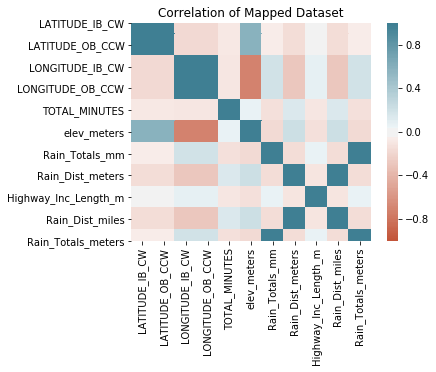

In [8]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation of Mapped Dataset")
plt.show()

In [9]:
data.columns

Index(['ROADWAY_NAME', 'LATITUDE_IB_CW', 'LATITUDE_OB_CCW', 'LONGITUDE_IB_CW',
       'LONGITUDE_OB_CCW', 'COUNTY_NAME', 'TOTAL_MINUTES', 'ENTER_DATE',
       'ENTER_TIME', 'CLEAR_DATE', 'CLEAR_TIME', 'elev_meters',
       'Rain_Totals_mm', 'Rain_Dist_meters', 'Highway_Inc_Length_m',
       'Rain_Dist_miles', 'Rain_Totals_meters'],
      dtype='object')

In [10]:
data['COUNTY_NAME'].unique()

array(['Harris', 'Waller', 'Fort_Bend', 'Brazoria', 'Montgomery',
       'Galveston', 'Austin', 'Chambers'], dtype=object)

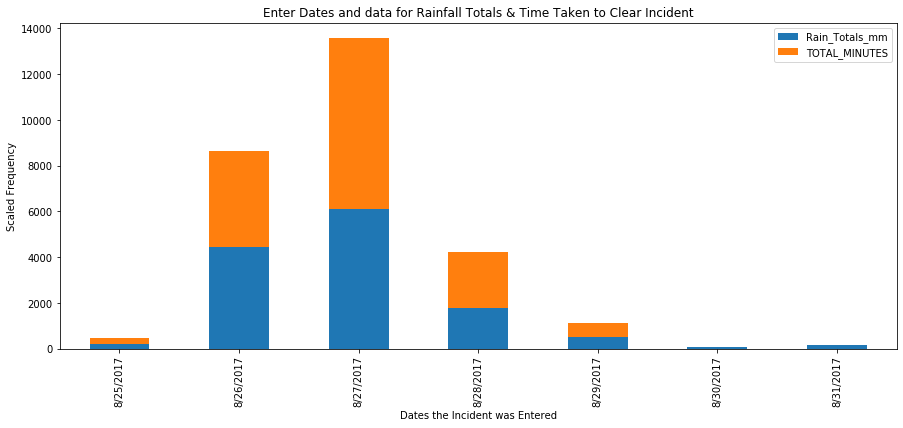

In [11]:
aggDf1=data.groupby('ENTER_DATE').agg({"Rain_Totals_mm":"sum", "TOTAL_MINUTES":"sum"}).reset_index()#.sum()['TOTAL_MINUTES']

aggDf1['TOTAL_MINUTES'] = aggDf1['TOTAL_MINUTES']/100;

aggDf1.plot(x='ENTER_DATE', y = ['Rain_Totals_mm', 'TOTAL_MINUTES'] , kind='bar', stacked=True, figsize=(15,6))
plt.title("Enter Dates and data for Rainfall Totals & Time Taken to Clear Incident")
plt.xlabel("Dates the Incident was Entered")
plt.ylabel("Scaled Frequency")
plt.show()

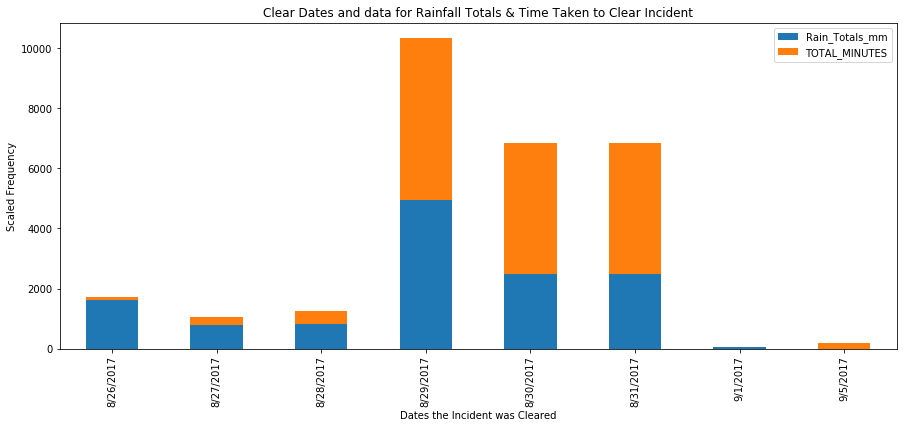

In [13]:
aggDf2=data.groupby('CLEAR_DATE').agg({"Rain_Totals_mm":"sum", "TOTAL_MINUTES":"sum"}).reset_index()#.sum()['TOTAL_MINUTES']

aggDf2['TOTAL_MINUTES'] = aggDf2['TOTAL_MINUTES']/100;

aggDf2.plot(x='CLEAR_DATE', y = ['Rain_Totals_mm', 'TOTAL_MINUTES'] , kind='bar', stacked=True, figsize=(15,6))
plt.xlabel("Dates the Incident was Cleared")
plt.ylabel("Scaled Frequency")
plt.title("Clear Dates and data for Rainfall Totals & Time Taken to Clear Incident")
plt.show()

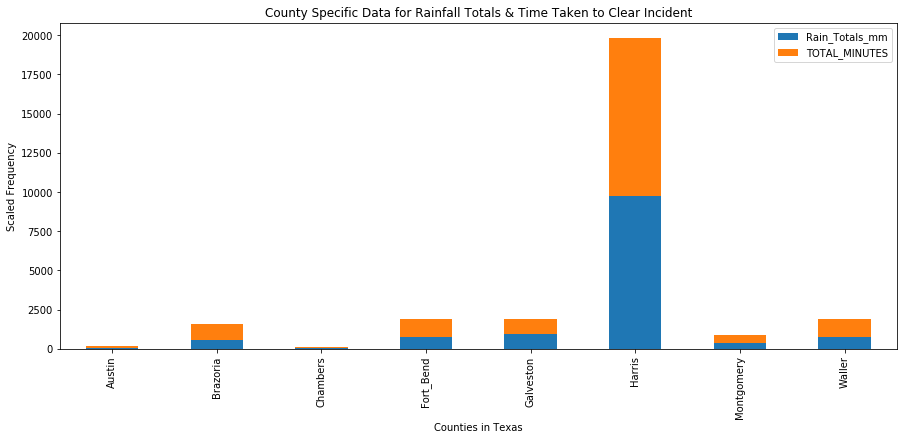

In [14]:
aggDf3=data.groupby('COUNTY_NAME').agg({"Rain_Totals_mm":"sum", "TOTAL_MINUTES":"sum"}).reset_index()#.sum()['TOTAL_MINUTES']

aggDf3['TOTAL_MINUTES'] = aggDf3['TOTAL_MINUTES']/100;

aggDf3.plot(x='COUNTY_NAME', y = ['Rain_Totals_mm', 'TOTAL_MINUTES'] , kind='bar', stacked=True, figsize=(15,6))
plt.xlabel("Counties in Texas")
plt.ylabel("Scaled Frequency")
plt.title("County Specific Data for Rainfall Totals & Time Taken to Clear Incident")
plt.show()

In [15]:
aggDf4=data.groupby('ROADWAY_NAME').agg({"Highway_Inc_Length_m":"sum", "TOTAL_MINUTES":"sum"}).reset_index()#.sum()['TOTAL_MINUTES']
#print(aggDf4)
#aggDf4['TOTAL_MINUTES'] = aggDf4['TOTAL_MINUTES']/100;
selectedAgg = aggDf4
#selectedAgg.drop(selectedAgg.index[selectedAgg['ROADWAY_NAME'] != ])
#dff.drop(dff.index[df['COUNTY_NAME'] != 'Harris'], inplace=True)
#aggDf4.plot(x='COUNTY_NAME', y = ['Rain_Totals_mm', 'TOTAL_MINUTES'] , kind='bar', stacked=True, figsize=(15,6))
#plt.xlabel = "Counties in Texas"
#plt.title("County Specific Data for Rainfall Totals & Time Taken to Clear Incident")
#plt.show()

In [16]:
#grab the names of highways that have a incident count higher than the hard coded limit of incidents
highways = data.groupby(["ROADWAY_NAME"])["TOTAL_MINUTES"].count()
highways = highways.sort_values()
highways = highways[highways > 9]

highwaynames = highways.index
print(highwaynames)
print(len(highwaynames))

Index(['IH-610 NORTH LOOP', 'IH-69', 'IH-10', 'IH-69 SOUTHWEST',
       'IH-69 Eastex Freeway', 'IH-10 KATY', 'IH-45 GULF', 'BELTWAY 8-NORTH',
       'IH-45', 'SH-288', 'HARDY TOLL ROAD', 'IH-45 NORTH', 'IH-10 EAST',
       'SHT'],
      dtype='object', name='ROADWAY_NAME')
14


In [17]:
selectedAgg = selectedAgg[selectedAgg['ROADWAY_NAME'].isin(highwaynames)]

In [18]:
selectedAgg['TOTAL_MINUTES'] = selectedAgg['TOTAL_MINUTES']/100
print(selectedAgg)

            ROADWAY_NAME  Highway_Inc_Length_m  TOTAL_MINUTES
1        BELTWAY 8-NORTH            493.531919         524.76
28       HARDY TOLL ROAD              0.000000         733.71
29                 IH-10              0.000000         492.93
30            IH-10 EAST            354.131554         622.91
31            IH-10 KATY            202.282588         621.28
32                 IH-45            257.351632         375.76
33            IH-45 GULF            270.423175         485.19
34           IH-45 NORTH             71.037584         523.54
36     IH-610 NORTH LOOP            343.632742         303.08
39                 IH-69             33.681608         368.78
40  IH-69 Eastex Freeway             26.783942         459.18
41       IH-69 SOUTHWEST            405.336541         364.54
49                SH-288            150.127671         535.00
58                   SHT           1514.052126        1907.31


/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


                  Roadways and Time Taken to Clear Incident & Highways Length Blocked


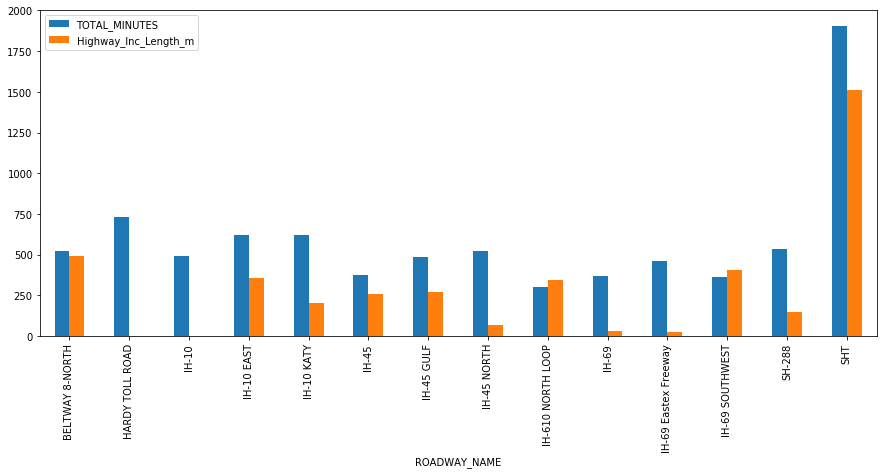

In [31]:
selectedAgg.plot(x='ROADWAY_NAME', y = ['TOTAL_MINUTES', 'Highway_Inc_Length_m'] , kind='bar', figsize=(15, 6))
#plt.xlabel("Roadways in Texas")
#plt.ylabel("Scaled Frequency")
#plt.title("Roadways and Time Taken to Clear Incident & Highways Length Blocked")
print("                  Roadways and Time Taken to Clear Incident & Highways Length Blocked")
plt.show()

In [32]:
data.columns

Index(['ROADWAY_NAME', 'LATITUDE_IB_CW', 'LATITUDE_OB_CCW', 'LONGITUDE_IB_CW',
       'LONGITUDE_OB_CCW', 'COUNTY_NAME', 'TOTAL_MINUTES', 'ENTER_DATE',
       'ENTER_TIME', 'CLEAR_DATE', 'CLEAR_TIME', 'elev_meters',
       'Rain_Totals_mm', 'Rain_Dist_meters', 'Highway_Inc_Length_m',
       'Rain_Dist_miles', 'Rain_Totals_meters'],
      dtype='object')

In [33]:
data.drop(data[data['TOTAL_MINUTES'] < 0].index, inplace = True)

In [35]:
from sklearn.model_selection import train_test_split

X=data[['elev_meters', 'Rain_Dist_meters', 'Highway_Inc_Length_m', 'Rain_Totals_meters']]  # Features
y=data['TOTAL_MINUTES']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Random Forest: Target Variable - TOTAL_MINUTES; Predictor Variables \n - Elev_meters, Rain_Totals_meters, Rain_Dist_meters, Highway_Inc_Length_m")


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("MSE: " , (metrics.mean_squared_error(y_test, y_pred))/60)
print("MAE: " , metrics.mean_absolute_error(y_test, y_pred))
print("R2: " , metrics.r2_score(y_test, y_pred))
print("Max Error: " , metrics.max_error(y_test, y_pred))
print("Explained Var: " , metrics.explained_variance_score(y_test, y_pred))

Random Forest: Target Variable - TOTAL_MINUTES; Predictor Variables 
 - Elev_meters, Rain_Totals_meters, Rain_Dist_meters, Highway_Inc_Length_m
MSE:  78153.97966903074
MAE:  1528.8652482269504
R2:  -0.3695819722662548
Max Error:  6027
Explained Var:  -0.36904956933240607


In [39]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['elev_meters', 'Rain_Dist_meters', 'Highway_Inc_Length_m', 'Rain_Totals_meters']).sort_values(ascending=False)
feature_imp

elev_meters             0.294876
Rain_Dist_meters        0.294301
Rain_Totals_meters      0.236271
Highway_Inc_Length_m    0.174552
dtype: float64

No handles with labels found to put in legend.


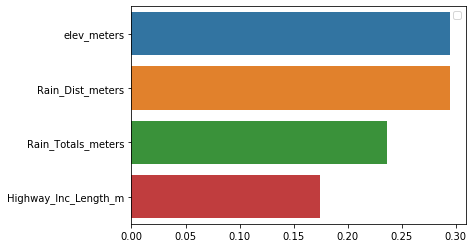

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel = 'Feature Importance Score'
plt.ylabel= 'Features'
plt.title = "Visualizing Important Features" 
plt.legend()
plt.show()

In [129]:
data.columns

Index(['ROADWAY_NAME', 'LATITUDE_IB_CW', 'LATITUDE_OB_CCW', 'LONGITUDE_IB_CW',
       'LONGITUDE_OB_CCW', 'COUNTY_NAME', 'TOTAL_MINUTES', 'ENTER_DATE',
       'ENTER_TIME', 'CLEAR_DATE', 'CLEAR_TIME', 'elev_meters',
       'Rain_Totals_mm', 'Rain_Dist_meters', 'Highway_Inc_Length_m',
       'Rain_Dist_miles', 'Rain_Totals_meters'],
      dtype='object')

In [42]:
predictors = ['elev_meters', 'Highway_Inc_Length_m', 'Rain_Totals_meters', 'Rain_Dist_meters']
target = 'TOTAL_MINUTES'
RunRandomForest(data, predictors, target)

NameError: name 'RunRandomForest' is not defined

In [47]:
def RunRandomForest(data, predictors, target):
    ########## Import train_test_split function
    from sklearn.model_selection import train_test_split
    # Split dataset into features and labels
    X=data[predictors]  # Removed feature "sepal length"
    y=data[target]                                       
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

    from sklearn.ensemble import RandomForestClassifier
    ######### Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)
    ######### Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    ######### prediction on test set
    y_pred=clf.predict(X_test)

    #print("Random Forest: Target Variable - TOTAL_MINUTES; Predictor Variables - \n", predictors)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    print("MSE: " , (metrics.mean_squared_error(y_test, y_pred))/60)
    print("MAE: " , metrics.mean_absolute_error(y_test, y_pred))
    print("R2: " , metrics.r2_score(y_test, y_pred))
    print("Max Error: " , metrics.max_error(y_test, y_pred))
    print("Explained Var: " , metrics.explained_variance_score(y_test, y_pred))

In [154]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=5)
folds.get_n_splits(X)
fold = 1
for train_index, test_index in folds.split(data):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fold+=1
    print(f"Round {fold}")
    print("MSE: " , (metrics.mean_squared_error(y_test, y_pred))/60)
    print("MAE: " , metrics.mean_absolute_error(y_test, y_pred))
    print("R2: " , metrics.r2_score(y_test, y_pred))
    print("Max Error: " , metrics.max_error(y_test, y_pred))
    print("Explained Var: " , metrics.explained_variance_score(y_test, y_pred))

/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Round 2
MSE:  118850.64166666666
MAE:  2055.946808510638
R2:  -1.7964576479757421
Max Error:  7211
Explained Var:  -1.552037881084432
Round 3
MSE:  122656.87482269504
MAE:  2123.553191489362
R2:  -1.0150714791507216
Max Error:  7111
Explained Var:  -0.9131588145848395
Round 4
MSE:  99779.92186379927
MAE:  1903.8709677419354
R2:  -1.0525771129815635
Max Error:  6601
Explained Var:  -1.0357552684153086
Round 5
MSE:  110696.63297491039
MAE:  1984.6666666666667
R2:  -0.8401365881917904
Max Error:  6025
Explained Var:  -0.8024719784293579
Round 6
MSE:  100832.66093189965
MAE:  1895.3548387096773
R2:  -1.00274040434756
Max Error:  6065
Explained Var:  -1.0018666314399778


/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

In [41]:
from sklearn.model_selection import train_test_split

X=data[['elev_meters', 'Rain_Dist_meters', 'Highway_Inc_Length_m', 'Rain_Totals_meters']]  # Features
y=data['TOTAL_MINUTES']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("MSE: " , (metrics.mean_squared_error(y_test, y_pred)))
print("MAE: " , metrics.mean_absolute_error(y_test, y_pred))
print("R2: " , metrics.r2_score(y_test, y_pred))
print("Max Error: " , metrics.max_error(y_test, y_pred))
print("Explained Var: ", metrics.explained_variance_score(y_test, y_pred))

MSE:  5029982.921985815
MAE:  1681.177304964539
R2:  -0.7226667072522517
Max Error:  6301
Explained Var:  -0.7226098968043884


In [43]:
RunSVM(data,predictors, target)

MSE:  4744406.815602837
MAE:  1531.212765957447
R2:  -0.4035454084562078
Max Error:  7016
Explained Var:  -0.4031917731957071


In [48]:
def RunSVM (data, predictors, target):
    from sklearn.model_selection import train_test_split
    X=data[predictors]  # Features
    y=data[target]  # Labels
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
    
    #Import svm model
    from sklearn import svm

    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    print("MSE: " , (metrics.mean_squared_error(y_test, y_pred)))
    print("MAE: " , metrics.mean_absolute_error(y_test, y_pred))
    print("R2: " , metrics.r2_score(y_test, y_pred))
    print("Max Error: " , metrics.max_error(y_test, y_pred))
    print("Explained Var: ", metrics.explained_variance_score(y_test, y_pred))

In [49]:
data.columns

Index(['ROADWAY_NAME', 'LATITUDE_IB_CW', 'LATITUDE_OB_CCW', 'LONGITUDE_IB_CW',
       'LONGITUDE_OB_CCW', 'COUNTY_NAME', 'TOTAL_MINUTES', 'ENTER_DATE',
       'ENTER_TIME', 'CLEAR_DATE', 'CLEAR_TIME', 'elev_meters',
       'Rain_Totals_mm', 'Rain_Dist_meters', 'Highway_Inc_Length_m',
       'Rain_Dist_miles', 'Rain_Totals_meters'],
      dtype='object')

In [50]:
#RF & #SVM
#regression
predictors = ['elev_meters', 'Highway_Inc_Length_m', 'Rain_Totals_meters', 'Rain_Dist_meters']
target = 'TOTAL_MINUTES'
print("TARGET VARIABLE - ", target)
print("PREDICTOR VARIABLES - ", predictors)
print("")
print("Random Forest - ")
RunRandomForest(data, predictors, target)
print("")
print("Support Vector Machine - ")
RunSVM(data, predictors, target)

TARGET VARIABLE -  TOTAL_MINUTES
PREDICTOR VARIABLES -  ['elev_meters', 'Highway_Inc_Length_m', 'Rain_Totals_meters', 'Rain_Dist_meters']

Random Forest - 
MSE:  88340.00519877675
MAE:  1709.8960244648317
R2:  -0.6030296261098664
Max Error:  6272
Explained Var:  -0.5828658391212445

Support Vector Machine - 
MSE:  4950245.55319149
MAE:  1680.2482269503546
R2:  -0.6562369079315085
Max Error:  6272
Explained Var:  -0.6451673409045027


In [51]:
#RF & #SVM
#regression
predictors = ['elev_meters', 'Rain_Totals_meters', 'Rain_Dist_meters']
target = 'TOTAL_MINUTES'
print("TARGET VARIABLE - ", target)
print("PREDICTOR VARIABLES - ", predictors)
print("")
print("Random Forest - ")
RunRandomForest(data, predictors, target)
print("")
print("Support Vector Machine - ")
RunSVM(data, predictors, target)

TARGET VARIABLE -  TOTAL_MINUTES
PREDICTOR VARIABLES -  ['elev_meters', 'Rain_Totals_meters', 'Rain_Dist_meters']

Random Forest - 
MSE:  93988.84714576961
MAE:  1754.4984709480123
R2:  -0.7055342724913802
Max Error:  7020
Explained Var:  -0.7029926344128659

Support Vector Machine - 
MSE:  5968887.716312056
MAE:  1763.6737588652481
R2:  -0.613428850553297
Max Error:  6358
Explained Var:  -0.5849984748943253


In [52]:
#RF & #SVM
#regression
predictors = ['elev_meters', 'Rain_Totals_meters']
target = 'TOTAL_MINUTES'
print("TARGET VARIABLE - ", target)
print("PREDICTOR VARIABLES - ", predictors)
print("")
print("Random Forest - ")
RunRandomForest(data, predictors, target)
print("")
print("Support Vector Machine - ")
RunSVM(data, predictors, target)

TARGET VARIABLE -  TOTAL_MINUTES
PREDICTOR VARIABLES -  ['elev_meters', 'Rain_Totals_meters']

Random Forest - 
MSE:  95748.4365443425
MAE:  1813.6727828746177
R2:  -0.7374640185826815
Max Error:  6451
Explained Var:  -0.7024879992830111

Support Vector Machine - 
MSE:  6611646.170212766
MAE:  1984.9078014184397
R2:  -1.1823249602570245
Max Error:  7213
Explained Var:  -1.170286254824283


In [53]:
#RF & #SVM
#regression
predictors = ['elev_meters', 'Highway_Inc_Length_m' ]
target = 'TOTAL_MINUTES'
print("TARGET VARIABLE - ", target)
print("PREDICTOR VARIABLES - ", predictors)
print("")
print("Random Forest - ")
RunRandomForest(data, predictors, target)
print("")
print("Support Vector Machine - ")
RunSVM(data, predictors, target)

TARGET VARIABLE -  TOTAL_MINUTES
PREDICTOR VARIABLES -  ['elev_meters', 'Highway_Inc_Length_m']

Random Forest - 
MSE:  112855.44352701325
MAE:  1889.7003058103976
R2:  -1.047890070127325
Max Error:  9295
Explained Var:  -0.9735521231688389

Support Vector Machine - 
MSE:  4700339.191489362
MAE:  1604.8085106382978
R2:  -0.8460441049264695
Max Error:  6404
Explained Var:  -0.778067610258971


In [54]:
#RF & #SVM
#regression
predictors = ['elev_meters']
target = 'TOTAL_MINUTES'
print("TARGET VARIABLE - ", target)
print("PREDICTOR VARIABLES - ", predictors)
print("")
print("Random Forest - ")
RunRandomForest(data, predictors, target)
print("")
print("Support Vector Machine - ")
RunSVM(data, predictors, target)

TARGET VARIABLE -  TOTAL_MINUTES
PREDICTOR VARIABLES -  ['elev_meters']

Random Forest - 
MSE:  113116.01549439348
MAE:  1933.1681957186545
R2:  -1.052618444123957
Max Error:  9295
Explained Var:  -1.0079244274111918

Support Vector Machine - 
MSE:  5485367.1773049645
MAE:  1805.4893617021276
R2:  -0.6340345151971283
Max Error:  7211
Explained Var:  -0.5850481498071964


In [55]:
#RF & #SVM
#regression
predictors = ['Highway_Inc_Length_m', 'Rain_Totals_meters', 'Rain_Dist_meters']
target = 'TOTAL_MINUTES'
print("TARGET VARIABLE - ", target)
print("PREDICTOR VARIABLES - ", predictors)
print("")
print("Random Forest - ")
RunRandomForest(data, predictors, target)
print("")
print("Support Vector Machine - ")
RunSVM(data, predictors, target)

TARGET VARIABLE -  TOTAL_MINUTES
PREDICTOR VARIABLES -  ['Highway_Inc_Length_m', 'Rain_Totals_meters', 'Rain_Dist_meters']

Random Forest - 
MSE:  95055.53944954129
MAE:  1828.34250764526
R2:  -0.7248906146269933
Max Error:  6355
Explained Var:  -0.6772468080526779

Support Vector Machine - 
MSE:  6360306.29787234
MAE:  1851.4609929078015
R2:  -1.0252489543548196
Max Error:  8584
Explained Var:  -1.011784820217926
